<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tutorialspoint.com/scikit_learn/scikit_learn_tutorial.pdf
https://scikit-learn.org/stable/modules/preprocessing.html
https://datastart.ru/blog/read/chto-takoe-scikit-learn-gayd-po-populyarnoy-biblioteke-python-dlya-nachinayuschih 

https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability?hl=ru

Scikit-learn - одна из наиболее популярных библиотек Python для Data Science и Machine Learning. Она позволяет выполнять большое количество операций и предоставляет множество алгоритмов. Scikit-learn также предлагает отличную документацию, в том числе и на русском языке описывающую классы, методы и функции библиотеки, а также описание  алгоритмов с необходимыми сведениями из математики. 

Scikit-Learn имеет в своём составе методы для:

- предварительной обработки данных;
- уменьшения размерности;
- подбора требуемой  модели;
- регрессии;
- классификации;
- кластерного анализа.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Для реализации алгоритмов машинного обучения желательно иметь достаточно большой набор данных, иначе теряется сам смысл применения сложных инструментов. Для работы мы используем набор данных [League of Legends Diamond Ranked Games (10 min)](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min), который содержит  статистику 9879 рейтинговых игр (SOLO QUEUE) с высоким рейтингом ELO  (DIAMOND I - MASTER)за первые 10 минут игры. 

In [3]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
lol.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [ ]:
lol.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

# Разделение данных

Разделение набора данных в Scikit-learn решено функцией `sklearn.model_selection.train_test_split`. Сначала нужно определить целевую (зависимую) переменную, у нас это будет индикатор принимающий значение "1" в случае победы команды синих, и "0" - в случае поражения.Ведь нельзя оценить прогностическую эффективность модели с теми же данными, которые  использовались для обучения. Вам нужно оценить модель со свежими данными, которые модель раньше "не видела". Этого можно добиться этого, разделив набор данных перед его использованием.

In [7]:
X=lol[['blueKills','blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood','blueDeaths', 'blueAssists',]]
y=lol['blueWins']

Чтобы объективно проверить точность  модели на данных, которые модель "не видела",  набор данных делят на две части — тренировочный и тестовый набор . Тренировочный набор применяется для обучения модели, а тестовый соответственно для проверки. 

В следущем примере данные будут разделены в соотношении 70/30, т. е. 70% данных будут использоваться как
 данные для тренировки (обучения) модели, а 30% будут использоваться в качестве тестовых данных.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6915, 6)
(2964, 6)
(6915,)
(2964,)


In [82]:
X.iloc[[1]]

,blueKills,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueAssists
1,5,12,1,0,5,5


In [81]:
y.iloc[[1]]

1    0
Name: blueWins, dtype: int64

# Алгоритмы машинного обучения Scikit-Learn

Более подробно применение каждого алгоритма мы разберём в следующем модуле, а сейчас сосредоточимся на рассмотрении возможностей именно библиотеки Scikit-Learn.

У Scikit-learn единый способ использования всех методов.
Для моделей (estimator object) доступны следующие методы.

- `model.fit()` – настройка на данные (обучение)

- `model.fit(X, y)` – для обучения с учителем (supervised learning)

- `model.fit(X)` – для обучение без учителя (unsupervised learning)

Для обучения с учителем:

`model.predict(X_test)` – предсказать значения целевой переменной

`model.predict_proba()` – выдать «степень уверенности» в ответе
(вероятность) – для некоторых моделей

`model.decision_function()` – решающая функция – для некоторых
моделей

`model.score()` – в большинстве моделей встроены методы оценки их
качества работы

`model.transform()` – для отбора признаков (feature selection)
«сжимает» обучающую матрицу. Для регрессионных моделей и
классификаторов (linear, RF и т.п.) выделяет наиболее
информативные признаки

In [107]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier.predict(X.iloc[[1]])

array([0])

Для оценки будем использовать штатный метод `score(X, y[, sample_weight])` который возвращает Accuracy - отношение точных прогнозов к общему их количеству или точнее

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

где 

TP - истинные положительные результаты (True Positive) прогноз совпал с реальностью

TN - истинные отрицательные результаты, (True Negative) , прогноз совпал с реальностью

FP - ложные положительные результаты (False Positive) ошибка 1-го рода, модель прогнозировала положительный результат, а на самом деле он отрицательный

FN - ложные отрицательные результаты (False Negative) ошибка 2-го рода, модель прогнозировала отрицательный результат, но на самом деле он положительный

In [79]:
classifier.score(X_test, y_test)

0.7004048582995951

С целью оценки прогноза используется матрица ошибок (confusion matrix) – таблица с 4 различными комбинациями прогнозируемых и фактических значений. Прогнозируемые значения описываются как положительные и отрицательные, а фактические – как истинные и ложные. Вообще матрица ошибок используется для оценки точности моделей в задачах классификации. Но прогнозирование и распознавание образов можно рассматривать как частный случай этой проблемы, поэтому confusion matrix актуальна и для измерения точности предсказаний. Важно, что матрица ошибок позволяет оценить эффективность прогноза не только в качественном, но и в количественном выражении

In [115]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1372  593]
 [ 591 1396]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


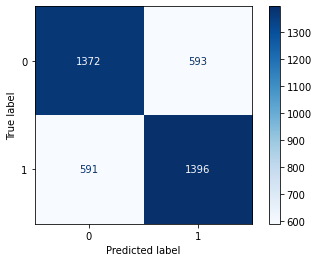

In [117]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

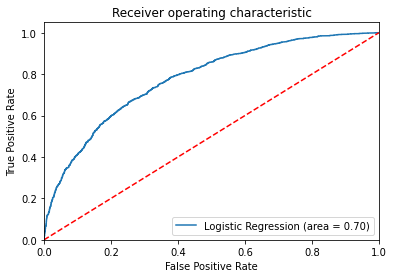

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1965
           1       0.70      0.70      0.70      1987

    accuracy                           0.70      3952
   macro avg       0.70      0.70      0.70      3952
weighted avg       0.70      0.70      0.70      3952



In [83]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
grb.score(X_train, y_train)

0.2775952454380425

In [84]:
grb.score(X_test, y_test)


0.22092140571794971

In [90]:
grb.predict(X.iloc[[1]])

array([0.47258811])

In [92]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)
print (tree)
print (tree.score(X_test, y_test))
print (tree.predict(X.iloc[[1]]))

DecisionTreeClassifier(max_depth=10)
0.6513157894736842
[1]


In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf.score(X_train, y_train)


0.8595357917429344

In [95]:
print (rf.score(X_test, y_test))
print (rf.predict(X.iloc[[1]]))


0.10030058010105547
[0.11]


In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [97]:
print (rf.score(X_test, y_test))
print (rf.predict(X.iloc[[1]]))

0.659665991902834
[0]


In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print (knn)
print (knn.score(X_test, y_test))

KNeighborsClassifier()
0.6535931174089069


In [68]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6986336032388664

In [69]:
clf.score(X_test, y_test)

0.6986336032388664

In [71]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.7021761133603239

In [72]:
clf.predict(X.iloc[[0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1])

In [42]:
scores['test_recall_macro']

array([0.70699592, 0.69684984, 0.69837523, 0.71659598, 0.69216196])

In [4]:
#displaying the mean and the standard deviation of the input data
print("Mean =", data.mean(axis=0))
print("Stddeviation = ", data.std(axis=0))
#Removing the mean and the standard deviation of the input data
data_scaled = preprocessing.scale(data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))

NameError: ignored

# Preprocessing data

Стандартизация наборов данных является общим требованием для многих средств оценки машинного обучения, реализованных в scikit-learn; они могут вести себя плохо, если отдельные функции более или менее не похожи на стандартные данные с нормальным распределением: гауссовские с нулевым средним и единичной дисперсией.

На практике мы часто игнорируем форму распределения и просто преобразуем данные, чтобы центрировать их, удаляя среднее значение каждого признака, а затем масштабируем его, деля непостоянные признаки на их стандартное отклонение.

Например, многие элементы, используемые в целевой функции алгоритма обучения (такие как ядро ​​RBF машин опорных векторов или регуляризаторы l1 и l2 линейных моделей), могут предполагать, что все признаки сосредоточены вокруг нуля или имеют дисперсию в одном и том же порядке. . Если функция имеет дисперсию, которая на порядки больше, чем другие, она может доминировать над целевой функцией и лишить оценщика возможности правильно учиться на других функциях, как и ожидалось.

Модуль предварительной обработки предоставляет служебный класс StandardScaler, который представляет собой быстрый и простой способ выполнить следующую операцию над массивом данных.

In [ ]:
from sklearn import preprocessing
import numpy as np
#X_train = np.array([[ 3., -1.,  2.],[ 2.,  5.,  0.],[ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler


scaler.mean_


scaler.scale_


X_scaled = scaler.transform(X_train)
X_scaled


array([[ 0.27134123, -0.78366085, -0.37496053,  0.9909305 ],
       [-0.06204978,  6.24809901,  1.90989325,  0.9909305 ],
       [ 0.27134123, -0.17936898,  0.08201023,  0.9909305 ],
       ...,
       [-0.39544079, -0.50898273, -1.28890204, -1.00915251],
       [-0.39544079, -0.50898273, -1.28890204, -1.00915251],
       [-1.72900485, -0.50898273, -0.83193129, -1.00915251]])

Масштабированные данные имеют нулевое среднее значение и дисперсию в единицах измерения

In [ ]:
X_scaled.mean(axis=0),X_scaled.std(axis=0)




(array([-2.82573033e-17, -1.04808907e-16, -5.13769151e-18, -1.33066210e-16]),
 array([1., 1., 1., 1.]))

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data



pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.6545209176788124

## Binarisation



Этот метод предварительной обработки используется, когда нам нужно преобразовать наши числовые значения в логические значения.

In [ ]:
import numpy as np
from sklearn import preprocessing
data = np.array([[2.1, -1.9, 5.5],
                      [-1.5, 2.4, 3.5],
                      [0.5, -7.9, 5.6],
                      [5.9, 2.3, -5.8]])
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


В приведенном выше примере мы использовали пороговое значение = 0,5, и поэтому все значения выше 0,5 будут преобразованы в 1, а все значения ниже 0,5 будут преобразованы в 0.

## Mean Removal

Этот метод используется для исключения среднего из вектора признаков, чтобы каждый признак был сосредоточен на нуле.

В приведенном ниже примере мы собираемся использовать классификатор KNN (K ближайших соседей).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors=3)

classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5887314439946019


# Classification Algorithms

some of the most popular classifications algorithms:

k-Nearest Neighbors
Logistic regression
Decision tree
Random forest
Support Vector Classification (SVC)